### Data analysis

This workbook provides a way to analyze the .pickle results from inverse design and negative selection. It also provides a plotting tool for $\phi$ field .npy files. The methods available in the Analysis class stored in src/analysis.py are:

1) plotTrajectory - plots the trajectory of free energy taken during the inverse design and negative selection, as well as the cell parameters during inverse design and a zoom in of the difference in alternate structure free energies to the target during negative selection
2) plotSequence - plots the sequence function and interaction matrix at (a) the initial guess (b) after inverse design (c) after negative selection
3) plotBlockChi - ONLY for the 'multiblock' sequence representation. Returns a plot of the block fraction and interblock $\chi N$ values
4) plotEnergy - plots the difference in free energy between the target and alternate structures.
5) plotStructures - plots the structure either as a volume, surface, or sliced at a specific plane.
6) movieStructures - does the same as plot except generates a .gif for the inverse design step
7) movieSequence - generates a .gif movie of the sequence during inverse design or negative selection
8) determineEqm - for a pickle file, re-evaluate the final refined solutions after negative selection to determine if the target is the equilibrium among considered alternates
9) plotPhi - for just plotting a $\phi$ .npy field. Must provide the full filepath to where the field is stored.

In [ ]:
### Data analysis workbook. Unpack the pickle file from Engaging simulations
### This part only run using jax (requires calculation of free energy)
import jax
import os
import sys
import importlib

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

import src.analysis
importlib.reload(src.analysis)
from src.analysis import Analysis


jax.config.update("jax_enable_x64", True)  # True for double precision
jax.config.update("jax_platform_name", "cpu")  # Use only CPU for data analysis

**Load the file**

If we are interested in only plotting a $\phi$ field, then Analysis should not have a file supplied

In [2]:
# Load the pickle file
pickle_folder = r'D:\Oliver\id_solutions' # r"..\converged_structures"
file_name = "2block_o70_long"  # This must be a pickle file containing the analysis data
sg = "F_d_d_d_1_32_32_32"  # This is the space group of the target structure
block_type = "multiblock"  #  multiblock, multiblock_taper, multiblock_poly, no_transform
basis = "linear_basis"  # linear_basis or chebyshev_basis
Nbasis = 125  # Either Ns if multiblock/taper/poly, or set manually if it is chebyshev basis

pickle_file = os.path.join(
    pickle_folder, file_name + ".pickle"
)  # This is the pickle file

# Set up an anlaysis class
analysis = Analysis(file=pickle_file, block_type=block_type, basis=basis, Nbasis=Nbasis)

# This is to set up which space groups to plot.
# 1) First, enter ALL the space groups of interest in this pickle file.
space_group = [
    "P_-1_48_1_1",
    "p_6_m_m_48_48_1",
    "I_a_-3_d_32_32_32",
    "I_m_-3_m_32_32_32",
    "F_d_d_d_1_32_32_32",
]
# For all entries in space group, create a dictionary where the key is the space group with '_0' and '_1' appended, and the value is the space group without these suffixes
sg_all = {sg + "_0": sg for sg in space_group}
sg_all.update({sg + "_1": sg for sg in space_group})
sg_dict = {"target": sg} | sg_all.copy()  # Copy the existing dictionary for plotting

# 2) Then, specify which space groups to actually plot. These are the keys of sg_dict. 'target' always refers to the target structure, and alternates can be specified based on which initial guess they were derived from
plotting_list = [
    "target"
]  # + ['P_-1_48_1_1_0', 'p_6_m_m_48_48_1', 'I_a_-3_d_32_32_32_1', 'I_m_-3_m_32_32_32_1']
sg_plotting_dict = {key: sg_dict[key] for key in plotting_list if key in sg_dict}

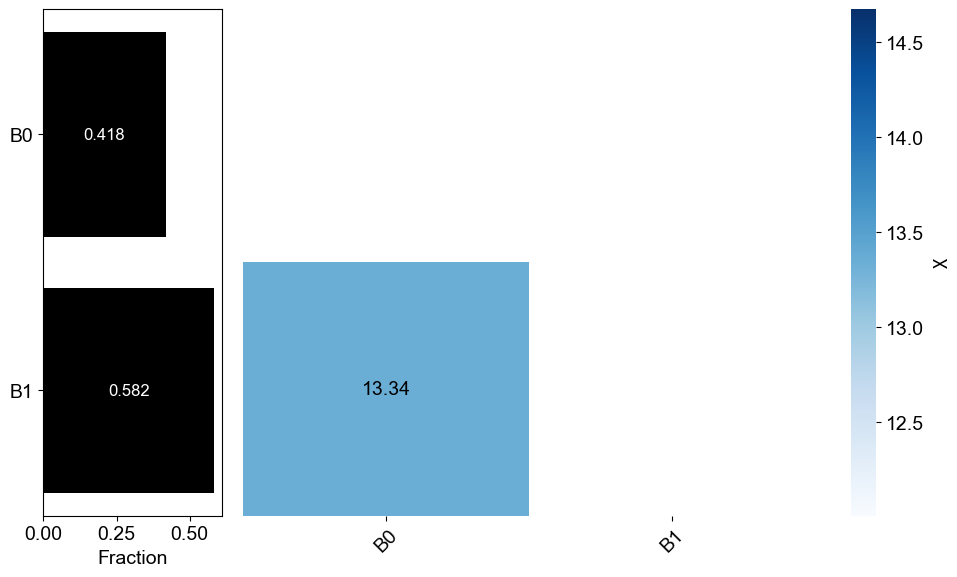

In [3]:
# Uncomment which method you want to run.

#_, free_energy, w_error, F_target = analysis.determineEqm(sg_dict = sg_dict)
#print(f"Free energy: {free_energy}, w_error: {w_error}, F_target: {F_target}")

#analysis.plotTrajectory(file_name, alternates = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ylim_2 = (-0.02, 0.01)) # alternates is a list containing the indices of the structures to plot. y limit can be supplied as a tuple

# analysis.plotSequence(file_name, figure_size=(2.5, 2.5), iteration = None)

analysis.plotBlockChi(file_name = file_name, stage = 'ns')

#chi_matrix, block_solvent_chi, seq_id = analysis.determineChiMicelle()

#analysis.plotEnergy(file_name, stage = 'ns', sg_dict = sg_dict)

# Method choices are 'volume', 'surface', 'slice'
#analysis.plotStructuresMicelle(method = 'volume', file_name=file_name, sg_dict=sg_plotting_dict, stage='id', origin = (0, 0, 0.50), normal = (0, 0, 1), c = 0.2, block = 0, cutoff = 0.5)

# Plot as a movie
# analysis.movieStructures(method = 'volume', file_name=file_name, sg_dict=sg_plotting_dict, origin = (0, 0, 0.80), normal = (0, 0, 1), cutoff = 0.5)

# analysis.movieSequence(file_name = file_name, mode = 'id')

# Plot just a phi field
# phi_file = ... # Enter the name of the phi file here ending in .npy
# cell = [ ... ] # This is a list containing the cell parameters. Only supply independent parameters e.g. for cubic, only one parameter is needed
# sg = ... # This is the space group of the phi field
# method = 'volume', 'surface', 'slice'
# analysis.plotPhi(method = 'volume', file_name = file_name, phi_file = CONVERGED_STRUCTURES_DIR \ phi_file, cell = cell, sg = sg)

In [ ]:
import jax.numpy as jnp
# Plot just a phi field
# phi_file = ... # Enter the name of the phi file here ending in .npy
# cell = [ ... ] # This is a list containing the cell parameters. Only supply independent parameters e.g. for cubic, only one parameter is needed
# sg = ... # This is the space group of the phi field
# method = 'volume', 'surface', 'slice'

# Load the pickle file
pickle_folder = r'..\converged_structures' # r"..\converged_structures"
file_name = 'scft_diblock_f70_c20_micelle'  # This must be a pickle file containing the analysis data
sg = "I_m_-3_m_32_32_32"  # This is the space group of the target structure
block_type = "multiblock"  #  multiblock, multiblock_taper, no_transform
basis = "linear_basis"  # linear_basis or chebyshev_basis
Nbasis = 125  # Either Ns if multiblock/taper, or set manually if it is chebyshev basis

file = os.path.join(
    pickle_folder, 'scft_diblock_f70_c20_micelle_I_m_-3_m_32_32_32_1_phi' + ".npy"
)

# Set up an anlaysis class
analysis = Analysis(file=file, block_type=block_type, basis=basis, Nbasis=Nbasis)
cell = jnp.array([10])

analysis.plotPhi(method = 'volume', file_name = file_name, phi_file = file, cell = cell, sg = sg, cmin = 0.0)